# Определение стоимости автомобилей

## Подготовка данных

In [1]:
#Загрузим все необходимые библиотеки
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
from statistics import mode
from catboost import CatBoostClassifier
import time 
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor 
from sklearn.preprocessing import LabelEncoder

In [2]:
#сохраняем данные файла в переменной df

In [3]:
#выводим данные на экран
display(df.head())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
#В названиях столбцов фигурируют большие буквы, приведем все к строчным значениям во избежание ошибок при обращении к столбцам
df.columns = df.columns.str.lower()
display(df.head(5))

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
#Изучем датасет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   kilometer          354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
#рассмотрим количество пропусков в переменных
df.isna().mean()

datecrawled          0.000000
price                0.000000
vehicletype          0.105794
registrationyear     0.000000
gearbox              0.055967
power                0.000000
model                0.055606
kilometer            0.000000
registrationmonth    0.000000
fueltype             0.092827
brand                0.000000
notrepaired          0.200791
datecreated          0.000000
numberofpictures     0.000000
postalcode           0.000000
lastseen             0.000000
dtype: float64

In [7]:
df.describe()

,price,registrationyear,power,kilometer,registrationmonth,numberofpictures,postalcode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Вывод: необдходимо
удалить ненужные столбцы
обработать пропуски vehicletype, gearbox, model, fueltype, notrepaired
удалить дубликаты
обработать категориальные переменные

In [8]:
#обработка пропусков

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='notrepaired', ylabel='count'>

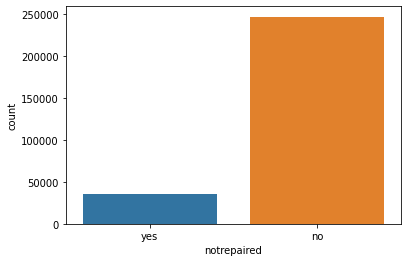

In [9]:
#изучем переменную notrepaired
sns.countplot(df.notrepaired)

In [10]:
#переменная включает в себя всего две категории, мы не можем точно указать категорию пропущенных поэтому запишем их как unknown
df['notrepaired'] = df['notrepaired'].fillna('unknown')

In [11]:
#переменная модель важна для заполнения остальных пропусков, поэтому для более точного заполнения относительно моделей удалим 
#отсутсвующие значения
df = df.dropna(subset=['model'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicletype', ylabel='count'>

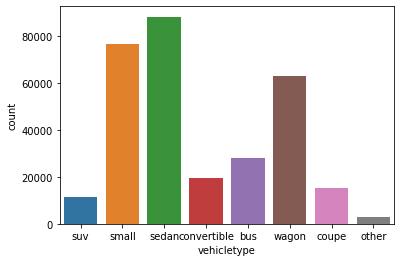

In [12]:
#изучим переменную vehicletype
sns.countplot(df.vehicletype)

In [13]:
print(df['vehicletype'].value_counts())

sedan          88119
small          76494
wagon          62996
bus            27794
convertible    19319
coupe          15239
suv            11237
other           2804
Name: vehicletype, dtype: int64


In [14]:
#заполним пропуски наиболее повторяющимися типами относительно бренда и модели
df['vehicletype'] = df.groupby(['brand', 'model'])['vehicletype'].transform(lambda x: x.fillna((x.mode()[0])))

In [15]:
display(df['vehicletype'].isna().sum())

0

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gearbox', ylabel='count'>

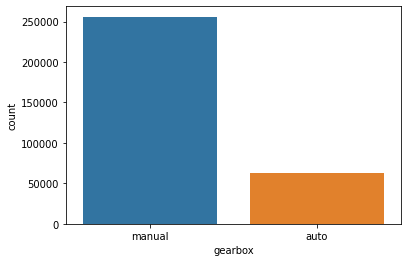

In [16]:
#изучим переменную gearbox
sns.countplot(df.gearbox) 

In [17]:
#заполним пропуски наиболее повторяющимися типами относительно бренда и модели
df['gearbox'] = df.groupby(['brand','model'])['gearbox'].transform(lambda x: x.fillna((x.mode()[0])))

In [18]:
display(df['gearbox'].isna().sum())

0

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fueltype', ylabel='count'>

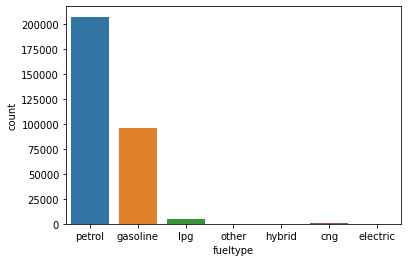

In [19]:
#изучим переменную fueltype
sns.countplot(df.fueltype) 

In [20]:
#заполним пропуски наиболее повторяющимися типами относительно бренда и модели
df['fueltype'] = df.groupby(['brand','model'])['fueltype'].transform(lambda x: x.fillna((x.mode()[0])))

In [21]:
display(df['fueltype'].isna().sum())

0

In [22]:
df.isna().mean()

datecrawled          0.0
price                0.0
vehicletype          0.0
registrationyear     0.0
gearbox              0.0
power                0.0
model                0.0
kilometer            0.0
registrationmonth    0.0
fueltype             0.0
brand                0.0
notrepaired          0.0
datecreated          0.0
numberofpictures     0.0
postalcode           0.0
lastseen             0.0
dtype: float64

Пропуски обработаны. Далее обработаем аномальные значения.

In [23]:
#минимальный год решистрации автомобиля 1000, максимальный 9999. Оставим только актуальный диапазон
df['datecreated'].sort_values()

61207     2014-03-10 00:00:00
4001      2015-03-20 00:00:00
342275    2015-06-18 00:00:00
86601     2015-08-07 00:00:00
175103    2015-08-10 00:00:00
                 ...         
262235    2016-04-07 00:00:00
39967     2016-04-07 00:00:00
343891    2016-04-07 00:00:00
259599    2016-04-07 00:00:00
135224    2016-04-07 00:00:00
Name: datecreated, Length: 334664, dtype: object

In [24]:
#объявления были созданы до апреля 2016 год, следовательно это верхняя граница диапазона годов,
#определим нижнюю границу
perc =[.05]
df['registrationyear'].describe(percentiles = perc)

count    334664.000000
mean       2003.923992
std          69.377219
min        1000.000000
5%         1993.000000
50%        2003.000000
max        9999.000000
Name: registrationyear, dtype: float64

In [25]:
#основной диапазон данных начинается с 1993 года и заканчивается в 2016
df = df.query('registrationyear >= 1993 and registrationyear < 2017')

In [26]:
df.shape

(306452, 16)

In [27]:
df.describe()

,price,registrationyear,power,kilometer,registrationmonth,numberofpictures,postalcode
count,306452.000000,306452.000000,306452.000000,306452.000000,306452.000000,306452.0,306452.000000
mean,4610.100652,2003.522382,113.329484,128765.189981,5.888547,0.0,50789.335230
std,4575.519993,5.306357,182.027995,36768.602293,3.662501,0.0,25698.523621
min,0.000000,1993.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1200.000000,1999.000000,75.000000,125000.000000,3.000000,0.0,30539.000000
50%,2900.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49632.000000
75%,6700.000000,2007.000000,143.000000,150000.000000,9.000000,0.0,71263.000000
max,20000.000000,2016.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [28]:
#минимальная цена реализации 0, что выглядит неправдоподобно, удалим строки с нулевой ценой
df = df.drop(df.query('price==100').index)
df.shape

(305658, 16)

<AxesSubplot:>

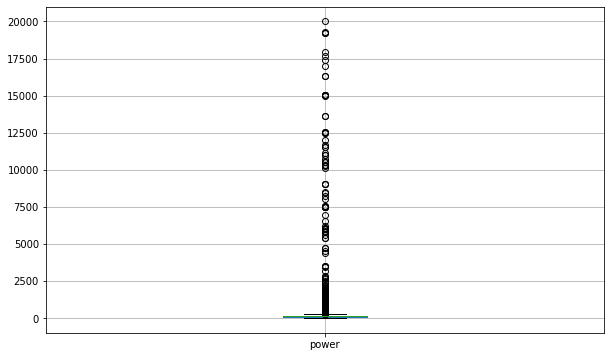

In [29]:
#верхняя и нижняя границы показателя мощности аномальны, выберем наиболее правдоподобный диапазон
df.boxplot(column = 'power',figsize=(10, 6))

<AxesSubplot:>

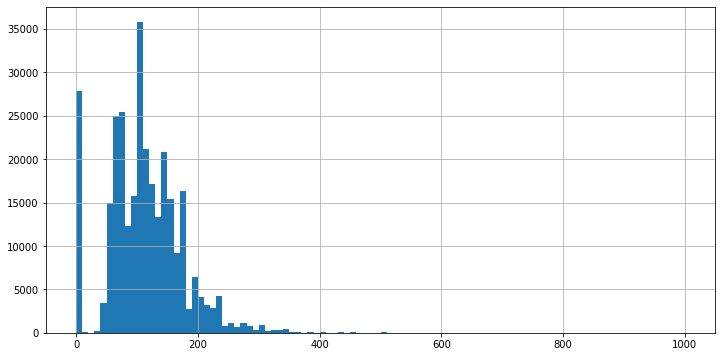

In [30]:
df['power'].hist(bins = 100,figsize=(12, 6), range=(0,1000))

In [31]:
#переменная мощность содержит много выбросов,ограничим диапазон до 500 л.с.
df = df.query('power > 0 and power < 500')

In [32]:
df.shape

(277433, 16)

In [33]:
#изучим месяцы присутсвующие в столбце registrationmonth
print(df['registrationmonth'].value_counts())

3     28533
6     25842
4     24039
5     24011
7     22056
10    21837
12    20118
11    19982
9     19965
1     18908
8     18720
2     17776
0     15646
Name: registrationmonth, dtype: int64


In [34]:
#Удалим столбцы которые не понадабятся нам для исследования
df = df.drop(['datecrawled', 'datecreated', 'numberofpictures', 'postalcode', 'lastseen', 'registrationmonth'], axis=1)

In [35]:
df.shape

(277433, 10)

In [36]:
#изучим взаимосвязь перменных между собой
df.corr()

,price,registrationyear,power,kilometer
price,1.000000,0.631006,0.505657,-0.398227
registrationyear,0.631006,1.000000,0.133305,-0.435036
power,0.505657,0.133305,1.000000,0.099094
kilometer,-0.398227,-0.435036,0.099094,1.000000


ВЫВОД: После обработки данных пришлось удалить довольно большое колечество аномальных данных. Учитывая размер изначального массива информации, вероятно оставшееся количество будет достаточным для дальнейшего исследования.Также были заменениы все пропуски в переменных. Взаимосвязь между переменными оптимальна для построения моделей.

## Обучение моделей

In [37]:
#перекодируем категориальные переменные с помощью LabelEncoder
cats_cols = list(df.select_dtypes(include='object').columns)
label_encode = LabelEncoder()
for column in cats_cols:
    label_encode.fit(df[column].astype('str'))
    df[column] = label_encode.transform(df[column].astype('str'))

In [38]:
#Определяем признаки и целевой признак
features = df.drop('price', axis=1)
target = df['price']

In [39]:
#Делим датасет на выборки
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [40]:
cat_features = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']

In [41]:
%%time
model = CatBoostRegressor()#построим модель градиентного бустинга catboost
params = {'n_estimators' : [10, 50],'learning_rate': [0.03, 0.1],'max_depth' : [4, 6, 10]}#задаем параметры
search_results = GridSearchCV(model,params,scoring='neg_mean_squared_error', cv=3)#поиск лучших параметров + перекрёстная проверка 
search_results.fit(X_train, Y_train, cat_features=cat_features, verbose=10) #обучаем
print('Best hyperparams: ', search_results.best_params_)#выводим лучише параметры
print('RMSE score on train sample: {:.2f}'.format((-search_results.best_score_) ** 0.5))#считаем rmse


0:	learn: 4544.8978872	total: 104ms	remaining: 940ms
9:	learn: 3899.5990827	total: 474ms	remaining: 0us
0:	learn: 4548.6210828	total: 48ms	remaining: 432ms
9:	learn: 3900.4164449	total: 433ms	remaining: 0us
0:	learn: 4556.7786530	total: 47.4ms	remaining: 427ms
9:	learn: 3904.9094134	total: 427ms	remaining: 0us
0:	learn: 4544.8978872	total: 46.2ms	remaining: 2.27s
10:	learn: 3839.8604152	total: 461ms	remaining: 1.64s
20:	learn: 3337.2776885	total: 832ms	remaining: 1.15s
30:	learn: 2986.5100198	total: 1.21s	remaining: 742ms
40:	learn: 2735.7874514	total: 1.58s	remaining: 348ms
49:	learn: 2567.6876773	total: 1.92s	remaining: 0us
0:	learn: 4548.6210828	total: 50.9ms	remaining: 2.49s
10:	learn: 3840.8717870	total: 448ms	remaining: 1.59s
20:	learn: 3338.1402152	total: 855ms	remaining: 1.18s
30:	learn: 2984.2155947	total: 1.24s	remaining: 759ms
40:	learn: 2732.4700922	total: 1.61s	remaining: 354ms
49:	learn: 2561.0404933	total: 1.96s	remaining: 0us
0:	learn: 4556.7786530	total: 47.4ms	remaini

In [42]:
%%time 
model_cat = CatBoostRegressor(n_estimators = 50,max_depth = 10, learning_rate = 0.1)
model_cat.fit(X_train, Y_train,verbose=10)

0:	learn: 4295.5139367	total: 70.5ms	remaining: 3.45s
10:	learn: 2481.3377060	total: 694ms	remaining: 2.46s
20:	learn: 1980.3037387	total: 1.32s	remaining: 1.83s
30:	learn: 1824.8775744	total: 1.9s	remaining: 1.17s
40:	learn: 1756.5920996	total: 2.48s	remaining: 545ms
49:	learn: 1719.0243887	total: 3.04s	remaining: 0us
CPU times: user 3.16 s, sys: 24.1 ms, total: 3.19 s
Wall time: 3.38 s


In [43]:
%%time
model_lgb = LGBMRegressor()#построим модель градиентного бустинга LightGBM 
params_lgb = {'n_estimators' : [10, 50],'learning_rate': [0.03, 0.1],'max_depth' : [4, 6, 10],'num_leaves' : [6,12,16]}#задаем параметры
search_results_lgb = GridSearchCV(model_lgb,param_grid=params_lgb,n_jobs=-1,scoring='neg_mean_squared_error', cv=3)#поиск лучших параметров + перекрёстная проверка
search_results_lgb.fit(X_train, Y_train)#обучаем
print('Best hyperparams: ', search_results_lgb.best_params_)#выводим лучише параметры
print('RMSE score on train sample: {:.2f}'.format((-search_results_lgb.best_score_) ** 0.5))#считаем rmse   


Best hyperparams:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'num_leaves': 16}
RMSE score on train sample: 1824.31
CPU times: user 9min 37s, sys: 2.85 s, total: 9min 39s
Wall time: 9min 43s


In [44]:
%%time 
model_lgb = LGBMRegressor(n_estimators = 50,max_depth = 10, learning_rate = 0.1, num_leaves=16)
model_lgb.fit(X_train, Y_train)

CPU times: user 2.23 s, sys: 9.92 ms, total: 2.24 s
Wall time: 2.29 s


LGBMRegressor(max_depth=10, n_estimators=50, num_leaves=16)

In [45]:
%%time
from sklearn.ensemble import RandomForestRegressor #построим модель случайного леса
model_forest = RandomForestRegressor()
params_forest = { 'n_estimators': [10,50],
                     'max_depth': [4, 6, 10],
                     'min_samples_leaf': [1,5] }#задаем параметры
search_results_forest = GridSearchCV(model_forest,params_forest,scoring='neg_mean_squared_error', cv=3)#поиск лучших параметров + перекрёстная проверка
search_results_forest.fit(X_train, Y_train)#обучаем
print('Best hyperparams: ', search_results_forest.best_params_)#выводим лучише параметры   
print('RMSE score on train sample: {:.2f}'.format((-search_results_forest.best_score_) ** 0.5))#считаем rmse 

Best hyperparams:  {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}
RMSE score on train sample: 1844.50
CPU times: user 2min 35s, sys: 288 ms, total: 2min 35s
Wall time: 2min 35s


In [46]:
%%time 
model_forest = RandomForestRegressor(n_estimators = 50, max_depth = 10, min_samples_leaf = 5)
model_forest.fit(X_train, Y_train)

CPU times: user 13.6 s, sys: 18.3 ms, total: 13.6 s
Wall time: 13.6 s


RandomForestRegressor(max_depth=10, min_samples_leaf=5, n_estimators=50)

Вывод:Построили три модели, две градиентного бустинга Catboost и LightGBM и модель случайного леса. Быстрее всех обучилась модель CatBoostRegressor - 8.63s, дольше всех LGBMRegressor - 1min 39s. Качество модели самое лучшее также у Catboost - 1720.28, худшее качество показала модель RandomForestRegressor -1845.54, при этом она оказалась не сильно хуже LGBMRegressor с показателем rmse 1825.23.

## Анализ моделей

Проверим результаты моделей на тестовой выборке, а также проверим их на адекватность с помощью DummyRegressor

In [53]:
%%time
model_forest = RandomForestRegressor(n_estimators = 50, max_depth = 10, min_samples_leaf = 5)
model_forest.fit(X_train, Y_train)
model_forest_prediction = model_forest.predict(X_test)

model_forest_rmse = mean_squared_error(Y_test, model_forest_prediction) ** 0.5
print('RMSE модели Случайного леса:', model_forest_rmse)

RMSE модели Случайного леса: 1864.0830278668543
CPU times: user 13.6 s, sys: 52.8 ms, total: 13.7 s
Wall time: 13.7 s


In [54]:
%%time
model_lgb = LGBMRegressor(n_estimators = 50,max_depth = 10, learning_rate = 0.1, num_leaves=16)
model_lgb.fit(X_train, Y_train)
model_lgb_prediction = model_lgb.predict(X_test)

model_lgb_rmse = mean_squared_error(Y_test, model_lgb_prediction) ** 0.5
print('RMSE модели LGB:', model_lgb_rmse)

RMSE модели LGB: 1843.6934610393564
CPU times: user 1min 31s, sys: 455 ms, total: 1min 31s
Wall time: 1min 32s


In [55]:
%%time
model_cat = CatBoostRegressor(n_estimators = 50,max_depth = 10, learning_rate = 0.1)
model_cat.fit(X_train, Y_train,verbose=10)
model_cat_prediction = model_cat.predict(X_test)

model_cat_rmse = mean_squared_error(Y_test, model_cat_prediction) ** 0.5
print('RMSE модели Catboost:', model_cat_rmse)

0:	learn: 4295.5139367	total: 55.4ms	remaining: 2.71s
10:	learn: 2481.3377060	total: 714ms	remaining: 2.53s
20:	learn: 1980.3037387	total: 1.3s	remaining: 1.79s
30:	learn: 1824.8775744	total: 1.88s	remaining: 1.15s
40:	learn: 1756.5920996	total: 2.48s	remaining: 545ms
49:	learn: 1719.0243887	total: 3s	remaining: 0us
RMSE модели Catboost: 1758.9023232951993
CPU times: user 3.17 s, sys: 8.34 ms, total: 3.17 s
Wall time: 3.42 s


In [56]:
from sklearn.dummy import DummyRegressor
dummy_regressor = DummyRegressor(strategy="median")
dummy_regressor.fit(X_train, Y_train)
dummy_pred = dummy_regressor.predict(X_test)
dummy_rmse = mean_squared_error(Y_test, dummy_pred) ** 0.5
print(dummy_rmse)

4935.195194952085


In [51]:
CatBoostquality = (1-1758.23/dummy_rmse)*100
LGBMRquality = (1-1846.84/dummy_rmse)*100
RandomForestquality = (1-1862.85/dummy_rmse)*100

In [60]:
results = {
    'Модель' : ['CatBoostRegressor', 'LGBMRegressor', 'RandomForestRegressor'],
    'RMSE' :pd.Series([1758.90, 1843.69, 1864.08]),
    'Время работы, сек': pd.Series([3.42, 92, 13.7]),
    'Качество' : pd.Series([CatBoostquality, LGBMRquality, RandomForestquality]),
    'Время обучения, сек': pd.Series([3.38, 2.29, 13.36])
    }
display(pd.DataFrame(results))


,Модель,RMSE,"Время работы, сек",Качество,"Время обучения, сек"
0,CatBoostRegressor,1758.90,3.42,64.373648,3.38
1,LGBMRegressor,1843.69,92.00,62.578177,2.29
2,RandomForestRegressor,1864.08,13.70,62.253773,13.36


Вывод: Модель CatBoostRegressor показала лучшее вермя работы и качество предсказаний, LGBMRegressor показала худшее качество чем у CatBoostRegressor, но не сильно лучше чем RandomForestRegressor при этом время работы модели самое долгое. RandomForestRegressor имеет худшее качетсво, но время работы сильно выигрывает по сравнению с LGBMRegressor, поэтому в данном случаее она была бы приемлемее чем LGBMRegressor.

## ВЫВОД:
В ходе исследования:
- проведена обработка исходного датасета, а именно удалены аномальные значения и обработаны пропуски;
- построены три модели - две градиентного бустинга и одна модель случайного леса;
- исходя из показателей важных для заказчика наиболее оптимальной оказалась модель CatBoostRegressor с временем работы 3,42 сек и RMSE 1758.23
